In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import numpy as np

titanic_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## Cleaning the Code

In [2]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
#Replace the NaN in Age and Fare to the mean of the column
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace = True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace = True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace = True)

#Changing female and male to 0s and 1s
titanic_data['Sex'] = titanic_data['Sex'].replace('female',1)
titanic_data['Sex'] = titanic_data['Sex'].replace('male',0)
test_data['Sex'] = test_data['Sex'].replace('female',1)
test_data['Sex'] = test_data['Sex'].replace('male',0)

#Round age to the ones place
titanic_data['Age'] = titanic_data['Age'].apply(np.floor).astype(int)
titanic_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(7), object(4)
memory usage: 83.7+ KB


In [4]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26,0,0,111369,30.0000,C148,C


## Comparing the amount of death of each sex

<AxesSubplot:xlabel='Sex'>

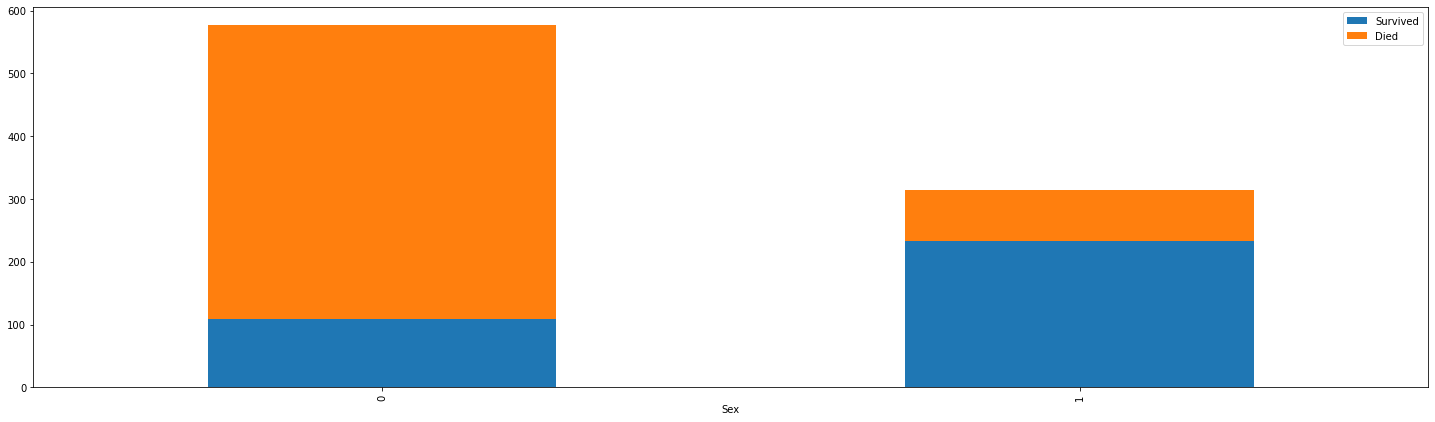

In [9]:
titanic_data['Died'] = 1 - titanic_data['Survived']
titanic_data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), stacked=True)

In [60]:
#Creating y and X
y = titanic_data.Survived
features = ['Pclass', 'Sex','Age', 'Fare']
X = titanic_data[features]

#Creating the test 
test_X = test_data[features]

#Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

#Specify and fit model
titanic_model = RandomForestRegressor(random_state = 1)
titanic_model.fit(train_X, train_y)

#Make validation predictions and calculate mean absolute error
titanic_val_predictions = titanic_model.predict(val_X)
titanic_val_mae = mean_absolute_error(titanic_val_predictions, val_y)

titanic_val_mae

# #Specify and fit model of test data
# full_model = RandomForestRegressor(random_state = 1)
# full_model = full_model.fit(X, y)

# #Make final predictions and round it to the ones place
# final_predictions = full_model.predict(test_X)
# final_predictions = final_predictions.round(decimals = 0).astype(int)
# final_predictions

0.24902230747597542

## Testing XGBoost

In [61]:
from xgboost import XGBRegressor

my_model = XGBRegressor(random_state = 1)
my_model.fit(train_X, train_y)

#Make validation predictions and calculate mean absolute error
preds = my_model.predict(val_X)
titanic_val_mae = mean_absolute_error(preds, val_y)

titanic_val_mae

# #Specify and fit model of test data
# full_model = RandomForestRegressor(random_state = 1)
# full_model = full_model.fit(X, y)

# #Make final predictions and round it to the ones place
# final_predictions = full_model.predict(test_X)
# final_predictions = final_predictions.round(decimals = 0).astype(int)
# final_predictions

0.2749948337958132

In [35]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId,
                     'Survived': final_predictions})
output.to_csv('titanic_submission4.csv', index=False) 